DEGREE OF INJURY PREDICTION FROM OCCUPATIONAL SAFETY DATASET OF OSHA

Submitted by : Nithin Raj

**TABLE OF CONTENTS**

1.Problem Statement
2.Objective
3.Data Collection
4.Data Description
5.EDA
6.Data Preprocessing
7.visualization
8.Feature Engineering
9.Data Splitting
10.Model Selection
11.Model Training and Evaluation
12.Feature Selection
13.Hyperparameter tuning
14.Saving the model
15.Load the model

**PROBLEM STATEMENT**

Workplace injuries pose a significant challenge to organizations, impacting both employee well-being and operational efficiency. Understanding the factors that contribute to injury severity is essential for improving safety measures and reducing incident severity. By predicting the severity of potential injuries, companies can better prioritize safety protocols, allocate resources effectively, and proactively address high-risk scenarios to foster a safer working environment

**OBJECTIVE**

Using occupational safety data from OSHA, this project aims to develop a predictive model to classify the degree of injury that may result from various workplace incidents based on factors such as environmental conditions, industry, incident type, employee demographics, and other relevant variables.

**DATA COLLECTION**

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

***Load the dataset and using pandas to import the data***

In [ ]:
data=pd.read_csv("/content/Final OSHA Accident and Inspections Data Merged May 2021.csv")
data.head(10)

,summary_nr,report_id,event_date,event_time,event_desc,event_keyword,const_end_use,build_stories,nonbuild_ht,project_cost,...,mail_city,mail_state,mail_zip,host_est_key,nr_in_estab,open_date,case_mod_date,close_conf_date,close_case_date,ld_dt
0,317585123,950411,00:00.0,NaN,Employee Is Discovered Unconscious in Truck,"UNCONSCIOUSNESS,WAREHOUSE,INDUSTRIAL TRUCK,TRUCK",NaN,NaN,NaN,NaN,...,CARROLLTON,TX,75006.0,N082 000061831,1.0,1/13/2014,9/18/2014,1/13/2014,6/30/2014,2014-09-22 01:01:17 EDT
1,317248219,950621,45:00.0,NaN,"Employee Falls from Porch Railing, Fractures Leg","FRACTURE,SLIP,HANDRAIL,WALKING SURFACE,FALL,OF...",NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,N092 000039717,180.0,12/19/2013,5/13/2016,5/30/2014,9/17/2014,2016-05-16 01:01:51 EDT
2,317229540,950632,13:00.0,NaN,Three Workers Fall from Collapsing Patio and S...,"BURN,COLLAPSE,CONSTRUCTION,ROOFER,FALL,FALL PR...",A,1.0,10.0,A,...,EL CENTRO,CA,92244.0,N064 000033568,3.0,8/15/2013,5/16/2017,1/27/2014,NaN,2017-05-19 01:01:37 EDT
3,317144186,950631,37:00.0,NaN,Worker Injures Shoulder and Rib in Fall from S...,"REPAIR,SHOULDER,UNDERPINNING,COLLAPSE,CARPENTE...",A,2.0,NaN,A,...,LAGUNA BEACH,CA,92651.0,N085 000029926,3.0,12/4/2013,2/16/2016,2/5/2014,8/20/2015,2016-02-19 01:11:40 EST
4,317142388,950631,20:00.0,NaN,Employee Is Injured When Struck by Falling Pal...,"INDUSTRIAL TRUCK,TRUCK,PALLET,STRUCK BY,UNSTAB...",NaN,NaN,NaN,NaN,...,ANAHEIM,CA,92807.0,N085 000029512,100.0,7/16/2013,10/17/2018,12/4/2013,7/13/2016,2018-10-22 00:05:39 EDT
5,316818327,950622,30:00.0,NaN,Employee Suffers Respiratory Failure While Wel...,"RESPIRATORY,STEEL,INHALATION,WELDING,IRON,TOXI...",G,3.0,40.0,E,...,SACRAMENTO,CA,95815.0,N067 000025744,7.0,8/7/2013,10/7/2013,10/4/2013,10/7/2013,2013-10-09 02:09:39 EDT
6,316817121,950622,15:00.0,NaN,Employee Killed in Mixer Accident,"FRACTURE,MIXER,HEALTH CARE FACILITY,SHAFT,CONC...",NaN,NaN,NaN,NaN,...,POWELL,TN,37849.0,N067 000025421,30.0,4/17/2013,5/17/2016,9/6/2013,5/17/2016,2016-05-20 01:04:50 EDT
7,316522218,950621,00:00.0,NaN,Chemical Odor Sends Eight Workers to the Emerg...,"RESPIRATORY,HEADACHE,CHEMICAL VAPOR,TOXIC FUME...",NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,N092 000038634,80.0,4/26/2013,1/3/2014,10/2/2013,12/17/2013,2014-01-06 01:01:06 EST
8,316522101,950621,30:00.0,NaN,Employee Suffers Burns Attempting to Put Out Fire,"BURN,CHEST,FIRE,HOSE,ARM,FACE,ASPHALT,WATER",NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,N092 000038655,12.0,4/22/2013,8/12/2015,8/27/2013,12/4/2014,2015-08-15 02:26:09 EDT
9,316521525,950621,30:00.0,NaN,Firefighter Injured in Fall at Training Site,"FIREFIGHTER,KNEE,FRACTURE,LACERATION,FALL,TOE,...",NaN,NaN,NaN,NaN,...,SACRAMENTO,CA,95814.0,N092 000038503,580.0,3/19/2013,7/29/2013,7/22/2013,7/26/2013,2013-07-31 02:11:06 EDT


**EXPLORATORY DATA ANALYSIS**

***Identifying the relevant columns by cross checking the name of columns***

In [ ]:
data.columns

Index(['summary_nr', 'report_id', 'event_date', 'event_time', 'event_desc',
       'event_keyword', 'const_end_use', 'build_stories', 'nonbuild_ht',
       'project_cost', 'project_type', 'sic_list', 'fatality', 'state_flag',
       'abstract_text', 'rel_insp_nr', 'age', 'sex', 'nature_of_inj',
       'part_of_body', 'src_of_injury', 'event_type', 'evn_factor',
       'hum_factor', 'occ_code', 'degree_of_inj', 'task_assigned', 'hazsub',
       'const_op', 'const_op_cause', 'fat_cause', 'fall_distance', 'fall_ht',
       'injury_line_nr', 'load_dt.1', 'activity_nr', 'reporting_id',
       'state_flag.1', 'estab_name', 'site_address', 'site_city', 'site_state',
       'site_zip', 'owner_type', 'owner_code', 'adv_notice', 'safety_hlth',
       'sic_code', 'naics_code', 'insp_type', 'insp_scope', 'why_no_insp',
       'union_status', 'safety_manuf', 'safety_const', 'safety_marit',
       'health_manuf', 'health_const', 'health_marit', 'migrant',
       'mail_street', 'mail_city', 'mail_sta

***Drop irrelevant columns by using data.drop***

In [ ]:
data = data.drop(['state_flag','health_const','nr_in_estab','reporting_id','health_marit','migrant','report_id','abstract_text','fall_distance', 'event_date','event_time','summary_nr','injury_line_nr','occ_code','naics_code','adv_notice','state_flag.1','site_zip','mail_street', 'mail_city', 'open_date', 'case_mod_date', 'close_conf_date','sic_code','host_est_key','site_address','mail_zip','owner_code','nonbuild_ht','close_case_date', 'ld_dt'],axis=1)

In [ ]:
data

,event_desc,event_keyword,const_end_use,build_stories,project_cost,project_type,sic_list,fatality,rel_insp_nr,age,...,safety_hlth,insp_type,insp_scope,why_no_insp,union_status,safety_manuf,safety_const,safety_marit,health_manuf,mail_state
0,Employee Is Discovered Unconscious in Truck,"UNCONSCIOUSNESS,WAREHOUSE,INDUSTRIAL TRUCK,TRUCK",NaN,NaN,NaN,NaN,4225.0,X,317585123.0,34.0,...,H,A,A,NaN,N,NaN,NaN,NaN,NaN,TX
1,"Employee Falls from Porch Railing, Fractures Leg","FRACTURE,SLIP,HANDRAIL,WALKING SURFACE,FALL,OF...",NaN,NaN,NaN,NaN,8051.0,NaN,317248219.0,49.0,...,S,A,B,NaN,N,NaN,NaN,NaN,NaN,NaN
2,Three Workers Fall from Collapsing Patio and S...,"BURN,COLLAPSE,CONSTRUCTION,ROOFER,FALL,FALL PR...",A,1.0,A,C,1761.0,NaN,317229540.0,60.0,...,S,A,B,NaN,N,NaN,NaN,NaN,NaN,CA
3,Worker Injures Shoulder and Rib in Fall from S...,"REPAIR,SHOULDER,UNDERPINNING,COLLAPSE,CARPENTE...",A,2.0,A,B,1521.0,NaN,317144186.0,60.0,...,S,A,B,NaN,N,NaN,NaN,NaN,NaN,CA
4,Employee Is Injured When Struck by Falling Pal...,"INDUSTRIAL TRUCK,TRUCK,PALLET,STRUCK BY,UNSTAB...",NaN,NaN,NaN,NaN,4212.0,NaN,317142305.0,69.0,...,S,G,B,NaN,N,NaN,NaN,NaN,NaN,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,Employee drowns as mudslide destroys dock cons...,"DOCK,DROWN,MUD SLIDE,FALLING OBJECT,WATER",NaN,NaN,NaN,NaN,8711.0,X,109431676.0,44.0,...,S,H,A,NaN,B,NaN,X,NaN,NaN,NaN
23892,Employees injured by flash fire,"WORK RULES,SCBA,TANK,BURN,CONFINED SPACE,FIRE,...",NaN,NaN,NaN,NaN,13111629.0,NaN,105867907.0,19.0,...,S,H,A,NaN,B,NaN,X,NaN,NaN,NaN
23893,"Employee fractures ribs, hip in fall from roof...","DECKING,FRACTURE,ROOF,WORK RULES,CONSTRUCTION,...",NaN,NaN,NaN,NaN,1629.0,NaN,105864813.0,43.0,...,S,H,A,NaN,A,NaN,NaN,NaN,NaN,NaN
23894,Employee killed when crushed between hammer an...,"CLEARANCE,PILE DRIVER,WORK RULES,CONSTRUCTION,...",NaN,NaN,NaN,NaN,1629.0,X,18167858.0,36.0,...,S,H,A,NaN,A,NaN,X,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23896 entries, 0 to 23895
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   event_desc      23895 non-null  object 
 1   event_keyword   23869 non-null  object 
 2   const_end_use   850 non-null    object 
 3   build_stories   547 non-null    float64
 4   project_cost    842 non-null    object 
 5   project_type    850 non-null    object 
 6   sic_list        23892 non-null  float64
 7   fatality        16064 non-null  object 
 8   rel_insp_nr     23892 non-null  float64
 9   age             23892 non-null  float64
 10  sex             23036 non-null  object 
 11  nature_of_inj   23892 non-null  float64
 12  part_of_body    23892 non-null  float64
 13  src_of_injury   23892 non-null  float64
 14  event_type      23892 non-null  float64
 15  evn_factor      23892 non-null  float64
 16  hum_factor      23892 non-null  float64
 17  degree_of_inj   23892 non-null 

***Get an overview of the dataset.This dataset contains 23896 columns and 40 rows. Datatypes are float,integer and objects.***

In [ ]:
data.describe()

,build_stories,sic_list,rel_insp_nr,age,nature_of_inj,part_of_body,src_of_injury,event_type,evn_factor,hum_factor,degree_of_inj,task_assigned,hazsub,const_op,const_op_cause,fat_cause,fall_ht,activity_nr
count,547.000000,2.389200e+04,2.389200e+04,23892.000000,23892.000000,23892.000000,23892.000000,23892.000000,23892.000000,23892.000000,23892.000000,23892.000000,2755.000000,23892.000000,23892.000000,23892.000000,381.000000,2.389600e+04
mean,3.001828,1.601442e+28,9.062128e+07,35.650469,10.319940,12.333124,23.937385,5.060355,9.719237,6.909886,1.341118,1.091537,5024.723412,0.758036,0.969111,0.547505,29.564304,2.260876e+07
std,5.331329,5.252407e+29,6.830564e+07,14.357838,6.964047,8.118363,12.369052,4.578125,5.761942,6.270022,0.643786,0.393366,3811.293966,5.610695,6.134728,3.275710,42.650343,5.753759e+07
min,1.000000,1.110000e+02,1.552670e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,1.000000,1.427370e+05
25%,1.000000,1.731000e+03,1.832453e+07,26.000000,5.000000,4.000000,15.000000,1.000000,6.000000,1.000000,1.000000,1.000000,1351.500000,0.000000,0.000000,0.000000,12.000000,8.985990e+05
50%,2.000000,2.431000e+03,1.034860e+08,34.000000,10.000000,13.000000,26.000000,4.000000,8.000000,6.000000,1.000000,1.000000,2592.000000,0.000000,0.000000,0.000000,19.000000,1.430644e+07
75%,3.000000,4.832000e+03,1.096215e+08,45.000000,12.000000,19.000000,30.000000,8.000000,13.000000,12.000000,2.000000,1.000000,8880.000000,0.000000,0.000000,0.000000,30.000000,1.447503e+07
max,60.000000,1.800000e+31,3.175851e+08,99.000000,22.000000,31.000000,48.000000,14.000000,18.000000,20.000000,3.000000,2.000000,9211.000000,71.000000,71.000000,30.000000,400.000000,3.175851e+08


 ***Get Summary statistics for numerical columns by using data.describe()***

In [ ]:
data.isnull().sum()

,0
event_desc,1
event_keyword,27
const_end_use,23046
build_stories,23349
project_cost,23054
project_type,23046
sic_list,4
fatality,7832
rel_insp_nr,4
age,4


In [ ]:
data.isnull().sum()/len(data)*100

,0
event_desc,0.004185
event_keyword,0.112990
const_end_use,96.442919
build_stories,97.710914
project_cost,96.476398
project_type,96.442919
sic_list,0.016739
fatality,32.775360
rel_insp_nr,0.016739
age,0.016739


In [ ]:
data=data.dropna(axis=1,thresh=15000)

In [ ]:
data.isnull().sum()/len(data)*100

,0
event_desc,0.004185
event_keyword,0.112990
sic_list,0.016739
fatality,32.775360
rel_insp_nr,0.016739
age,0.016739
sex,3.598929
nature_of_inj,0.016739
part_of_body,0.016739
src_of_injury,0.016739


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
23891,False
23892,False
23893,False
23894,False


In [ ]:
data.drop_duplicates()

,event_desc,event_keyword,sic_list,fatality,rel_insp_nr,age,sex,nature_of_inj,part_of_body,src_of_injury,...,fat_cause,load_dt.1,activity_nr,estab_name,site_city,site_state,safety_hlth,insp_type,insp_scope,union_status
0,Employee Is Discovered Unconscious in Truck,"UNCONSCIOUSNESS,WAREHOUSE,INDUSTRIAL TRUCK,TRUCK",4225.0,X,317585123.0,34.0,M,2.0,4.0,19.0,...,0.0,2019-07-22 00:18:41 EDT,317585123,"VAREL INTERNATIONAL IND., L.P.",SAFFORD,AZ,H,A,A,N
1,"Employee Falls from Porch Railing, Fractures Leg","FRACTURE,SLIP,HANDRAIL,WALKING SURFACE,FALL,OF...",8051.0,NaN,317248219.0,49.0,M,12.0,16.0,42.0,...,0.0,2019-07-22 00:18:41 EDT,317248219,ESKATON CARE CENTER,FAIR OAKS,CA,S,A,B,N
2,Three Workers Fall from Collapsing Patio and S...,"BURN,COLLAPSE,CONSTRUCTION,ROOFER,FALL,FALL PR...",1761.0,NaN,317229540.0,60.0,M,5.0,4.0,8.0,...,15.0,2019-07-22 00:18:41 EDT,317229540,ROBERTS CUSTOM ROOFING,EL CENTRO,CA,S,A,B,N
3,Worker Injures Shoulder and Rib in Fall from S...,"REPAIR,SHOULDER,UNDERPINNING,COLLAPSE,CARPENTE...",1521.0,NaN,317144186.0,60.0,M,9.0,22.0,42.0,...,16.0,2019-07-22 00:18:41 EDT,317144186,"STEVE DONNER CONSTRUCTION,INC.",LAGUNA BEACH,CA,S,A,B,N
4,Employee Is Injured When Struck by Falling Pal...,"INDUSTRIAL TRUCK,TRUCK,PALLET,STRUCK BY,UNSTAB...",4212.0,NaN,317142305.0,69.0,M,21.0,1.0,7.0,...,0.0,2019-07-22 00:18:41 EDT,317142388,JELLCO CONTAINER INC,ANAHEIM,CA,S,G,B,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,Employee drowns as mudslide destroys dock cons...,"DOCK,DROWN,MUD SLIDE,FALLING OBJECT,WATER",8711.0,X,109431676.0,44.0,M,10.0,5.0,6.0,...,0.0,2019-07-22 00:18:38 EDT,509091,TUALATIN DEVELOPMENT CO,Tigard,OR,S,H,A,B
23892,Employees injured by flash fire,"WORK RULES,SCBA,TANK,BURN,CONFINED SPACE,FIRE,...",13111629.0,NaN,105867907.0,19.0,M,5.0,1.0,16.0,...,0.0,2019-07-22 00:18:38 EDT,508960,KRVEGER CABLE COMMUNICATIONS,Hillsboro,OR,S,H,A,B
23893,"Employee fractures ribs, hip in fall from roof...","DECKING,FRACTURE,ROOF,WORK RULES,CONSTRUCTION,...",1629.0,NaN,105864813.0,43.0,M,12.0,4.0,42.0,...,0.0,2019-07-22 00:18:38 EDT,508945,PORTLAND SCHOOL DISTRICT 1 J,Portland,OR,S,H,A,A
23894,Employee killed when crushed between hammer an...,"CLEARANCE,PILE DRIVER,WORK RULES,CONSTRUCTION,...",1629.0,X,18167858.0,36.0,M,21.0,5.0,24.0,...,0.0,2019-07-22 00:18:38 EDT,508820,TOM BENSON GLASS CO INC,Portland,OR,S,H,A,A


***Finding out null values and duplicated values. remove duplicate values from the dataset .***

In [ ]:
num_data = data.select_dtypes(include="number")
num_data

,sic_list,rel_insp_nr,age,nature_of_inj,part_of_body,src_of_injury,event_type,evn_factor,hum_factor,degree_of_inj,task_assigned,const_op,const_op_cause,fat_cause,activity_nr
0,4225.0,317585123.0,34.0,2.0,4.0,19.0,8.0,7.0,1.0,1.0,1.0,0.0,0.0,0.0,317585123
1,8051.0,317248219.0,49.0,12.0,16.0,42.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0,0.0,317248219
2,1761.0,317229540.0,60.0,5.0,4.0,8.0,5.0,8.0,1.0,2.0,1.0,0.0,0.0,15.0,317229540
3,1521.0,317144186.0,60.0,9.0,22.0,42.0,5.0,13.0,14.0,2.0,1.0,14.0,14.0,16.0,317144186
4,4212.0,317142305.0,69.0,21.0,1.0,7.0,1.0,13.0,1.0,2.0,1.0,0.0,0.0,0.0,317142388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,8711.0,109431676.0,44.0,10.0,5.0,6.0,14.0,17.0,1.0,1.0,1.0,0.0,0.0,0.0,509091
23892,13111629.0,105867907.0,19.0,5.0,1.0,16.0,14.0,7.0,1.0,2.0,1.0,0.0,0.0,0.0,508960
23893,1629.0,105864813.0,43.0,12.0,4.0,42.0,5.0,13.0,1.0,2.0,1.0,0.0,0.0,0.0,508945
23894,1629.0,18167858.0,36.0,21.0,5.0,24.0,1.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,508820


In [ ]:
num_data.isnull().sum()

,0
sic_list,4
rel_insp_nr,4
age,4
nature_of_inj,4
part_of_body,4
src_of_injury,4
event_type,4
evn_factor,4
hum_factor,4
degree_of_inj,4


In [ ]:
from sklearn.impute import SimpleImputer

data['degree_of_inj'] = SimpleImputer(strategy='median').fit_transform(data[['degree_of_inj']])

<ipython-input-16-b702345c19f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['degree_of_inj'] = SimpleImputer(strategy='median').fit_transform(data[['degree_of_inj']])


***Seperatly check the numerical columns from the dataset and tried to impute the column name degree_of_inj by median***

In [ ]:
num_data.skew()

,0
sic_list,32.907944
rel_insp_nr,1.200112
age,0.044843
nature_of_inj,0.295127
part_of_body,0.518164
src_of_injury,-0.028251
event_type,0.887425
evn_factor,0.114438
hum_factor,0.561046
degree_of_inj,0.868272


In [ ]:
cat_data = data.select_dtypes(include="object")
cat_data

,event_desc,event_keyword,fatality,sex,load_dt.1,estab_name,site_city,site_state,safety_hlth,insp_type,insp_scope,union_status
0,Employee Is Discovered Unconscious in Truck,"UNCONSCIOUSNESS,WAREHOUSE,INDUSTRIAL TRUCK,TRUCK",X,M,2019-07-22 00:18:41 EDT,"VAREL INTERNATIONAL IND., L.P.",SAFFORD,AZ,H,A,A,N
1,"Employee Falls from Porch Railing, Fractures Leg","FRACTURE,SLIP,HANDRAIL,WALKING SURFACE,FALL,OF...",NaN,M,2019-07-22 00:18:41 EDT,ESKATON CARE CENTER,FAIR OAKS,CA,S,A,B,N
2,Three Workers Fall from Collapsing Patio and S...,"BURN,COLLAPSE,CONSTRUCTION,ROOFER,FALL,FALL PR...",NaN,M,2019-07-22 00:18:41 EDT,ROBERTS CUSTOM ROOFING,EL CENTRO,CA,S,A,B,N
3,Worker Injures Shoulder and Rib in Fall from S...,"REPAIR,SHOULDER,UNDERPINNING,COLLAPSE,CARPENTE...",NaN,M,2019-07-22 00:18:41 EDT,"STEVE DONNER CONSTRUCTION,INC.",LAGUNA BEACH,CA,S,A,B,N
4,Employee Is Injured When Struck by Falling Pal...,"INDUSTRIAL TRUCK,TRUCK,PALLET,STRUCK BY,UNSTAB...",NaN,M,2019-07-22 00:18:41 EDT,JELLCO CONTAINER INC,ANAHEIM,CA,S,G,B,N
...,...,...,...,...,...,...,...,...,...,...,...,...
23891,Employee drowns as mudslide destroys dock cons...,"DOCK,DROWN,MUD SLIDE,FALLING OBJECT,WATER",X,M,2019-07-22 00:18:38 EDT,TUALATIN DEVELOPMENT CO,Tigard,OR,S,H,A,B
23892,Employees injured by flash fire,"WORK RULES,SCBA,TANK,BURN,CONFINED SPACE,FIRE,...",NaN,M,2019-07-22 00:18:38 EDT,KRVEGER CABLE COMMUNICATIONS,Hillsboro,OR,S,H,A,B
23893,"Employee fractures ribs, hip in fall from roof...","DECKING,FRACTURE,ROOF,WORK RULES,CONSTRUCTION,...",NaN,M,2019-07-22 00:18:38 EDT,PORTLAND SCHOOL DISTRICT 1 J,Portland,OR,S,H,A,A
23894,Employee killed when crushed between hammer an...,"CLEARANCE,PILE DRIVER,WORK RULES,CONSTRUCTION,...",X,M,2019-07-22 00:18:38 EDT,TOM BENSON GLASS CO INC,Portland,OR,S,H,A,A


In [ ]:
cat_data.isnull().sum()

,0
event_desc,1
event_keyword,27
fatality,7832
sex,860
load_dt.1,4
estab_name,0
site_city,25
site_state,0
safety_hlth,0
insp_type,0


In [ ]:
data1=data.copy()
data1['fatality'].fillna('no',inplace=True)

<ipython-input-20-916ecba4813d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['fatality'].fillna('no',inplace=True)


In [ ]:
sex_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer and transform the 'sex' column
data['sex'] = sex_imputer.fit_transform(data[['sex']]).flatten()

<ipython-input-21-6475390866a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sex'] = sex_imputer.fit_transform(data[['sex']]).flatten()


In [ ]:
union_status_imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer and transform the 'union_status' column
data['union_status'] = union_status_imputer.fit_transform(data[['union_status']]).flatten()

<ipython-input-22-9bc3f6651be6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['union_status'] = union_status_imputer.fit_transform(data[['union_status']]).flatten()


***In this step we already checked the categorical columns and impute most_frequent values in some categorical columns***

In [ ]:
num_data

,sic_list,rel_insp_nr,age,nature_of_inj,part_of_body,src_of_injury,event_type,evn_factor,hum_factor,degree_of_inj,task_assigned,const_op,const_op_cause,fat_cause,activity_nr
0,4225.0,317585123.0,34.0,2.0,4.0,19.0,8.0,7.0,1.0,1.0,1.0,0.0,0.0,0.0,317585123
1,8051.0,317248219.0,49.0,12.0,16.0,42.0,5.0,8.0,10.0,2.0,2.0,0.0,0.0,0.0,317248219
2,1761.0,317229540.0,60.0,5.0,4.0,8.0,5.0,8.0,1.0,2.0,1.0,0.0,0.0,15.0,317229540
3,1521.0,317144186.0,60.0,9.0,22.0,42.0,5.0,13.0,14.0,2.0,1.0,14.0,14.0,16.0,317144186
4,4212.0,317142305.0,69.0,21.0,1.0,7.0,1.0,13.0,1.0,2.0,1.0,0.0,0.0,0.0,317142388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,8711.0,109431676.0,44.0,10.0,5.0,6.0,14.0,17.0,1.0,1.0,1.0,0.0,0.0,0.0,509091
23892,13111629.0,105867907.0,19.0,5.0,1.0,16.0,14.0,7.0,1.0,2.0,1.0,0.0,0.0,0.0,508960
23893,1629.0,105864813.0,43.0,12.0,4.0,42.0,5.0,13.0,1.0,2.0,1.0,0.0,0.0,0.0,508945
23894,1629.0,18167858.0,36.0,21.0,5.0,24.0,1.0,6.0,1.0,1.0,1.0,0.0,0.0,0.0,508820


In [ ]:
numeric_columns=list(num_data)
numeric_columns

['sic_list',
 'rel_insp_nr',
 'age',
 'nature_of_inj',
 'part_of_body',
 'src_of_injury',
 'event_type',
 'evn_factor',
 'hum_factor',
 'degree_of_inj',
 'task_assigned',
 'const_op',
 'const_op_cause',
 'fat_cause',
 'activity_nr']

***Visualize the distributions to check for outliers so plot histogram and boxplot.***

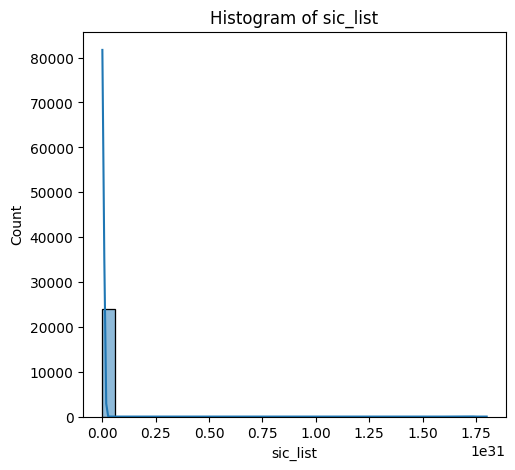

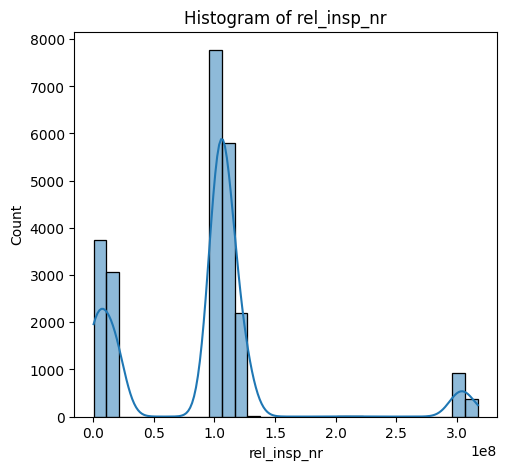

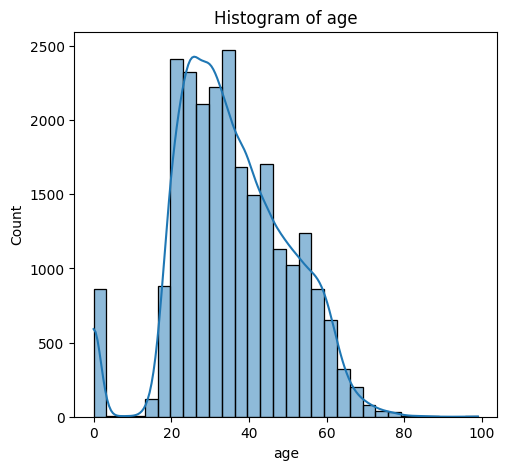

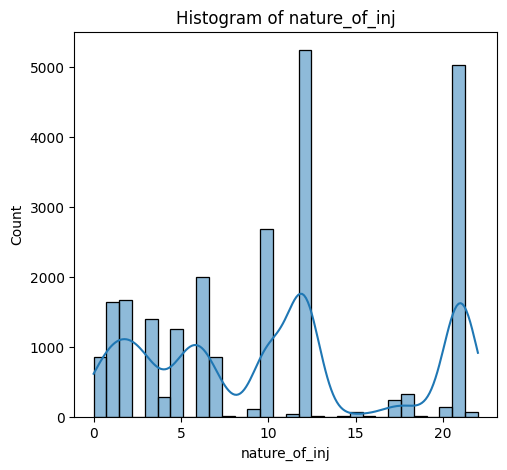

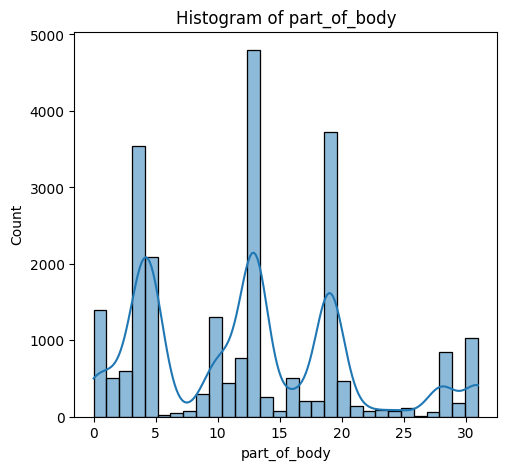

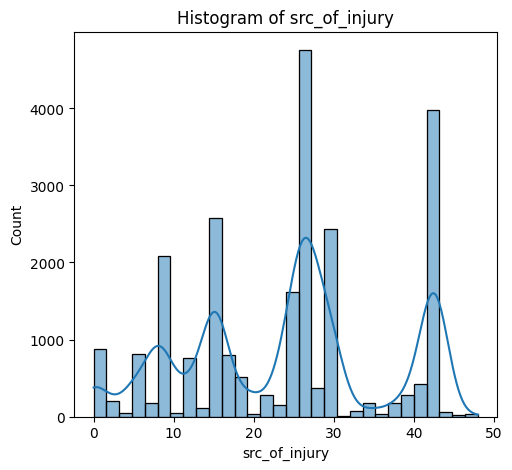

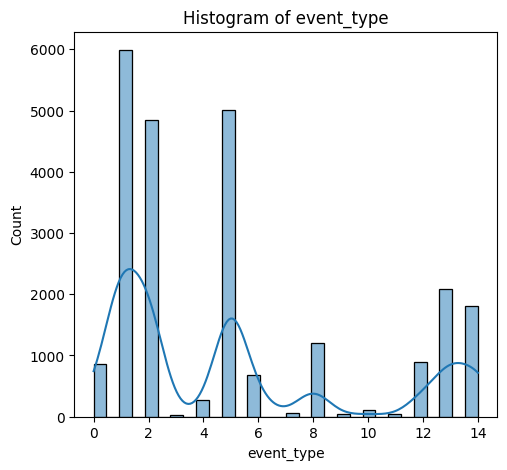

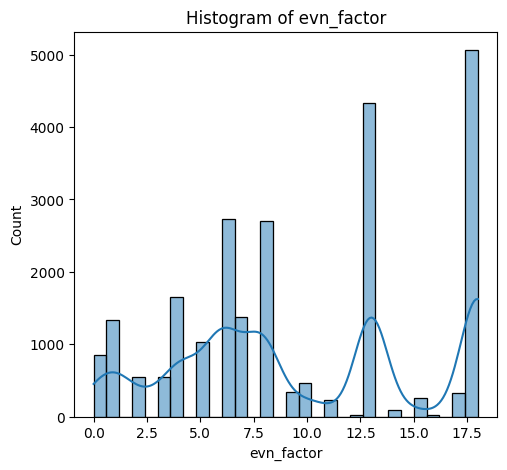

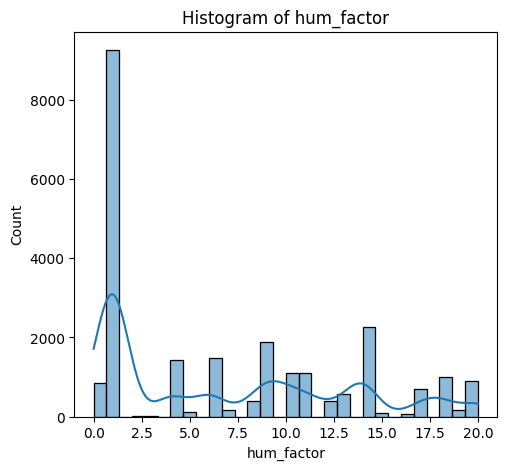

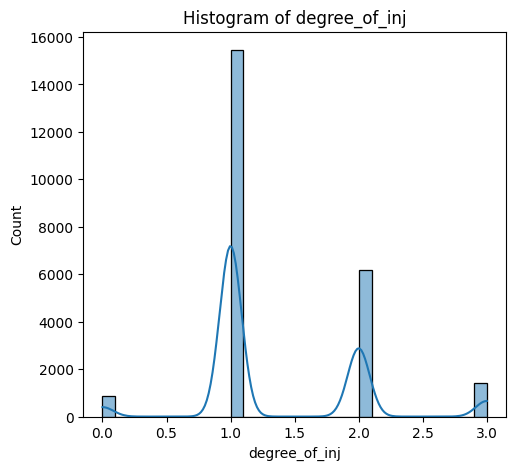

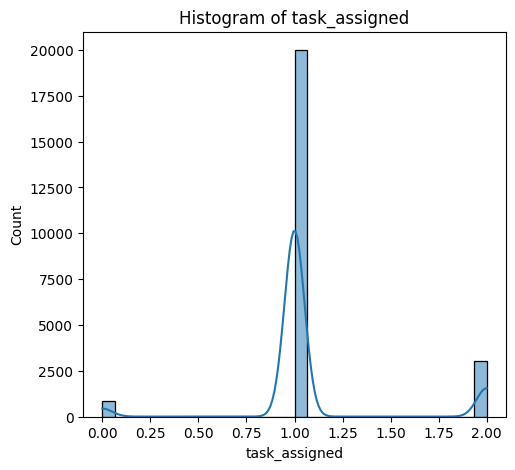

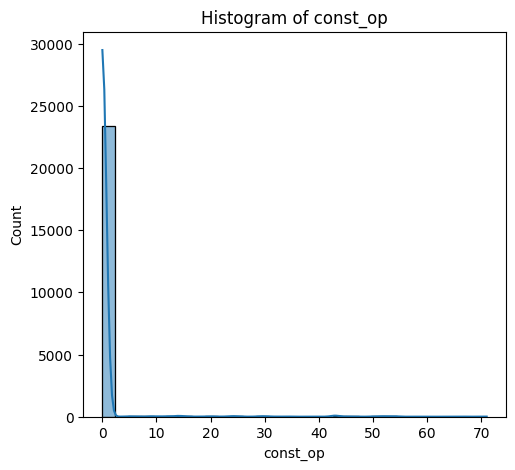

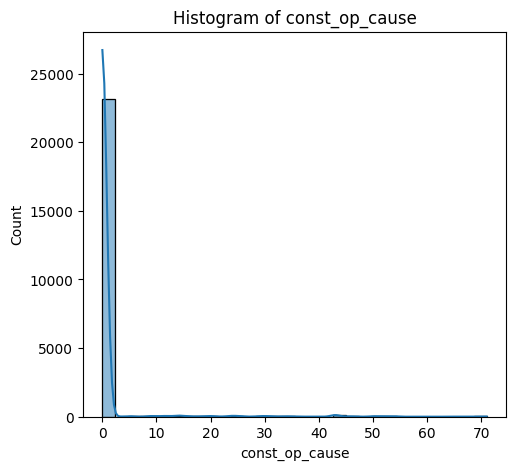

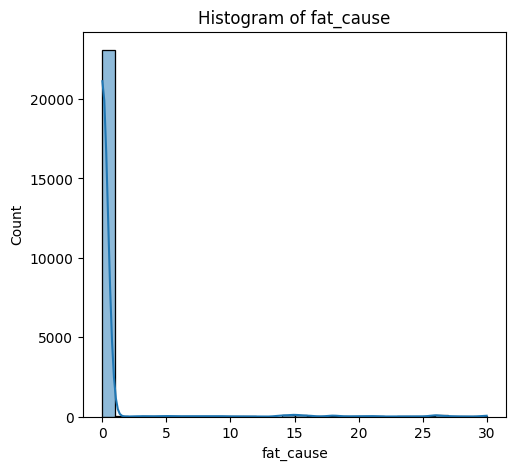

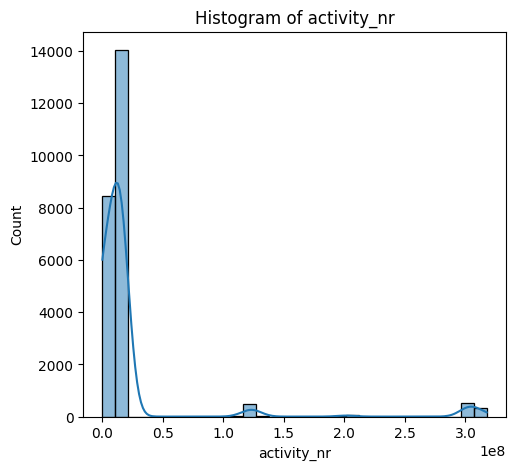

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)

    # Check if the column is numeric and cast to a numeric type if possible
    if data[column].dtype == 'object':
        try:
            data[column] = pd.to_numeric(data[column], errors='coerce')
        except ValueError:
            print(f"Warning: Skipping column '{column}' due to non-numeric values.")
            continue  # Skip this column if it can't be converted

    # Explicitly set the number of bins or bin range to avoid automatic calculation
    sns.histplot(data[column], kde=True, bins=30)  # Adjust the number of bins as needed
    # Or, use binrange: sns.histplot(data[column], kde=True, binrange=(min_val, max_val))

    plt.title(f'Histogram of {column}')
    plt.show()

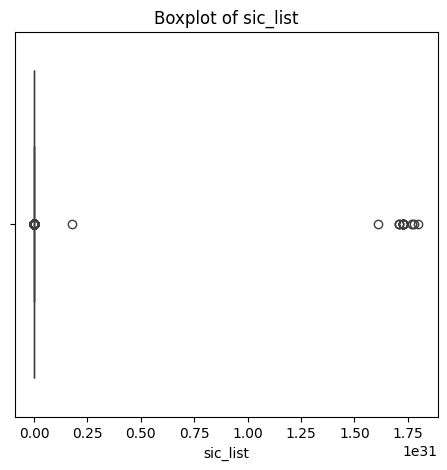

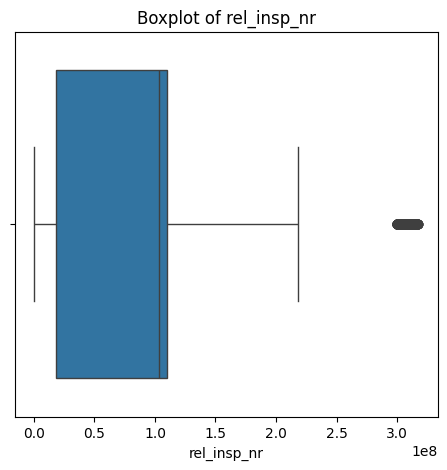

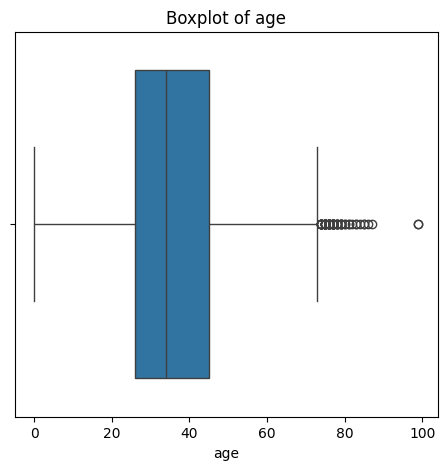

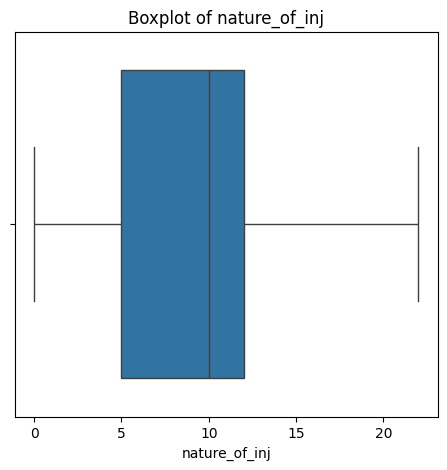

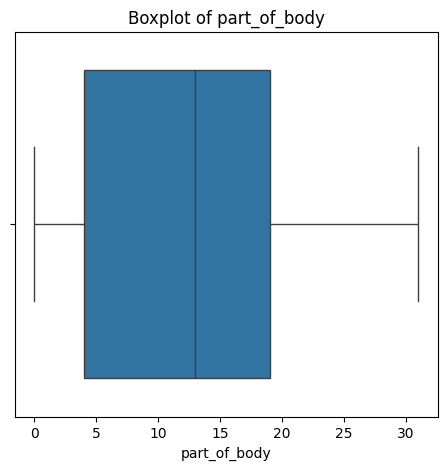

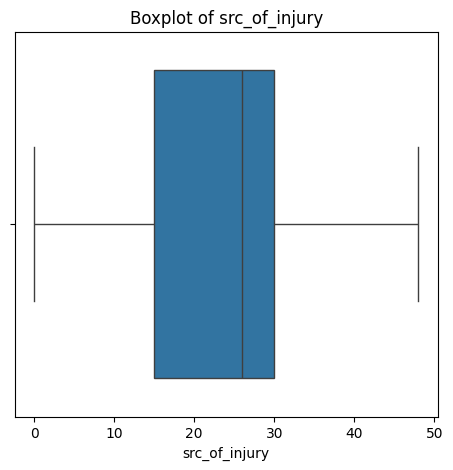

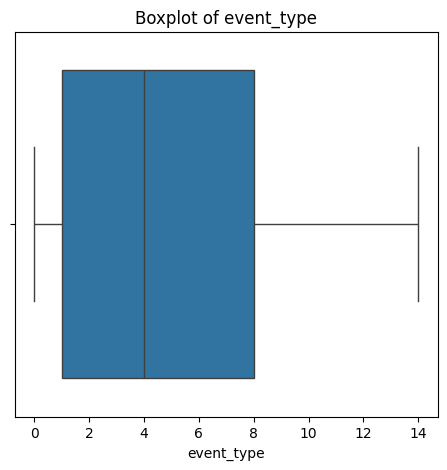

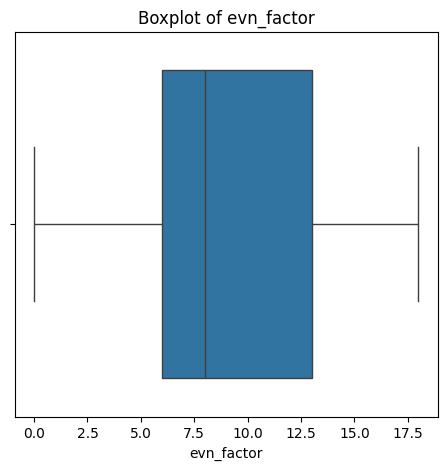

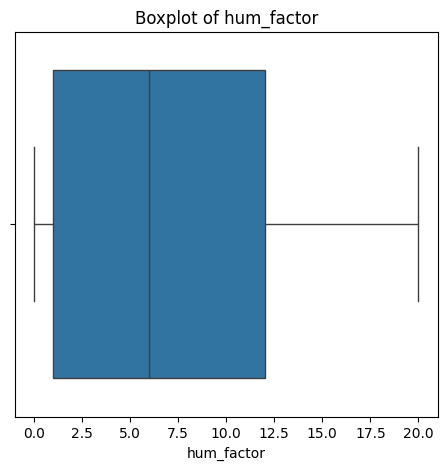

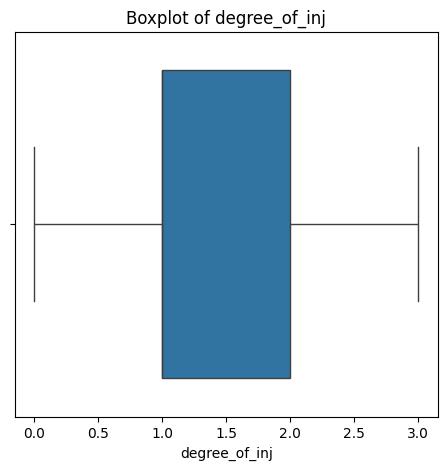

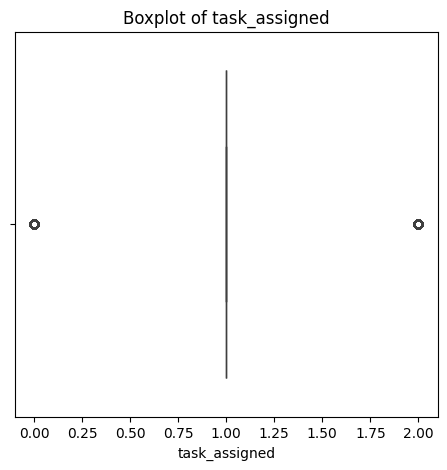

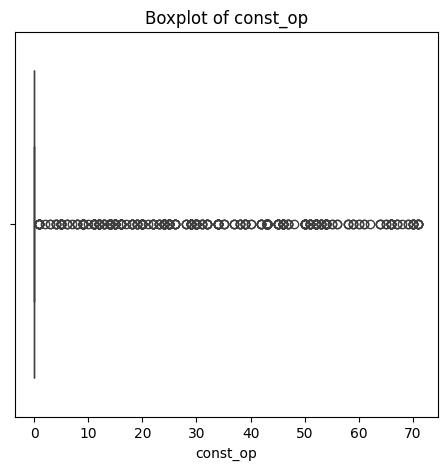

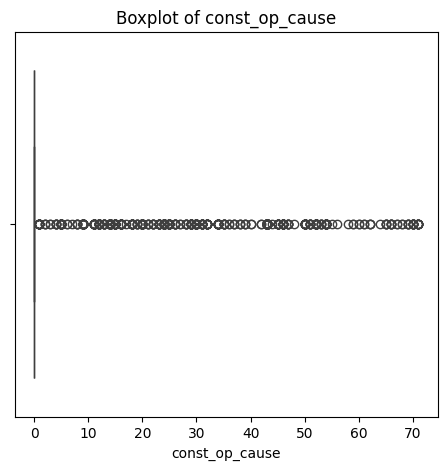

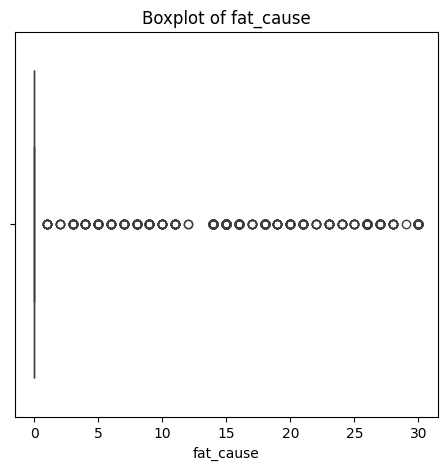

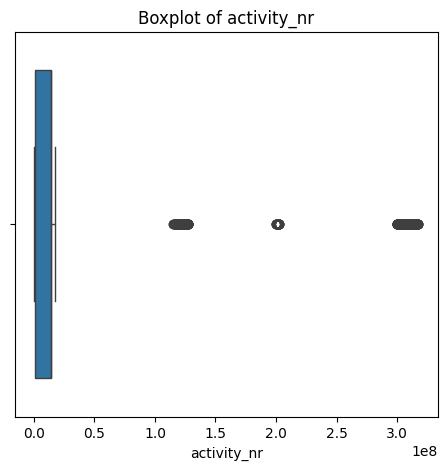

In [ ]:
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

 # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

    plt.show()

***Remove outliers by applying IQR(Inter Quartile Range) method and visualize again to cross check whether outliers removed or not.***

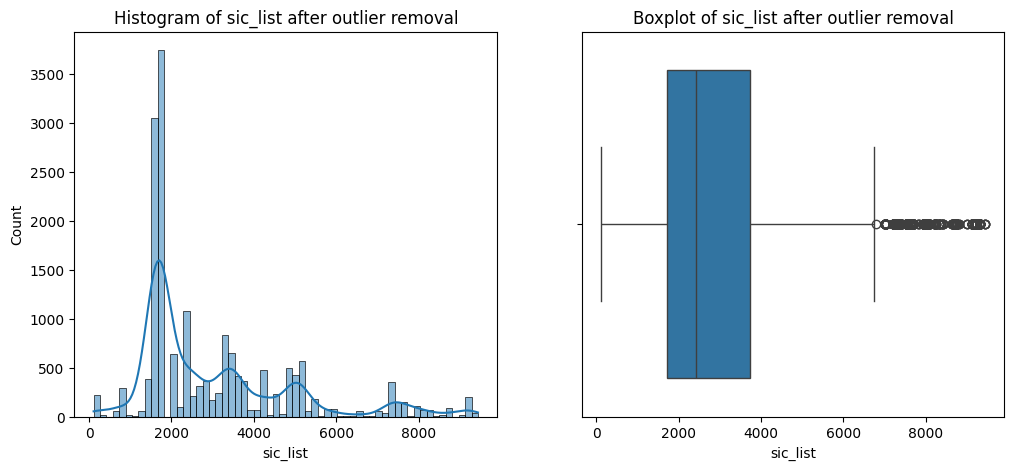

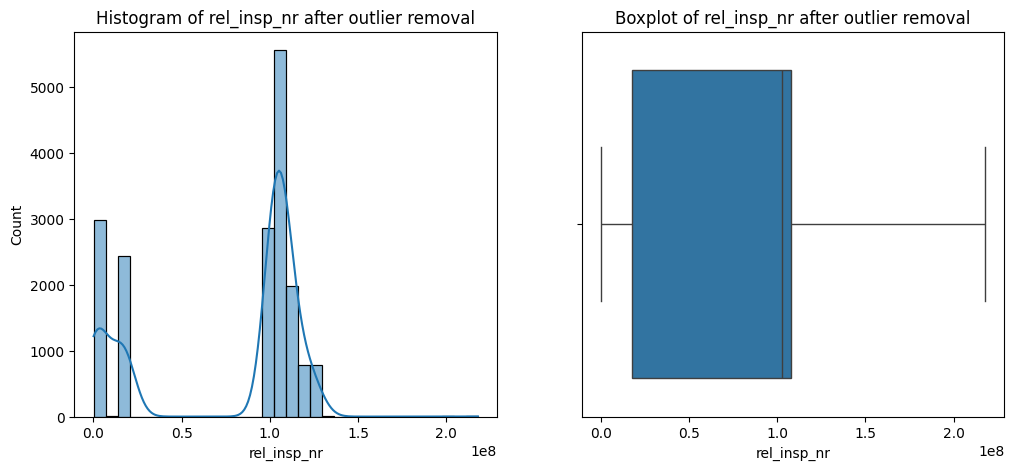

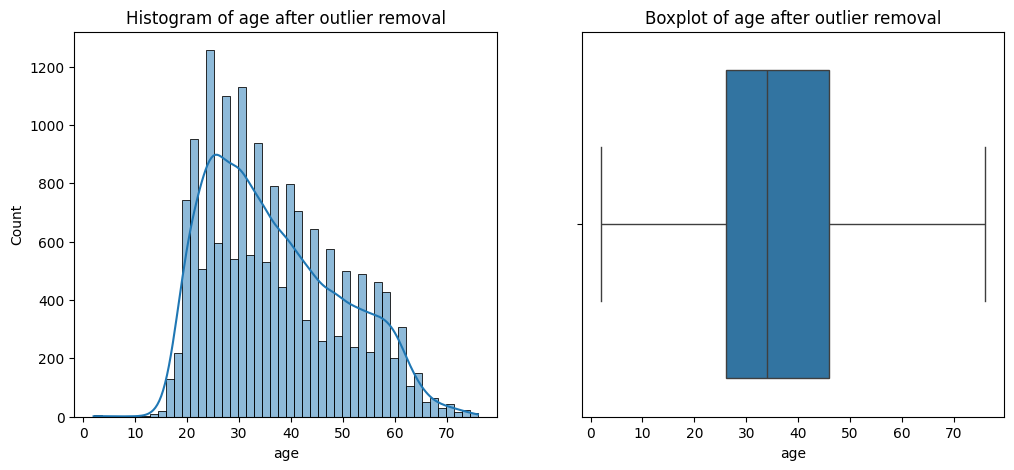

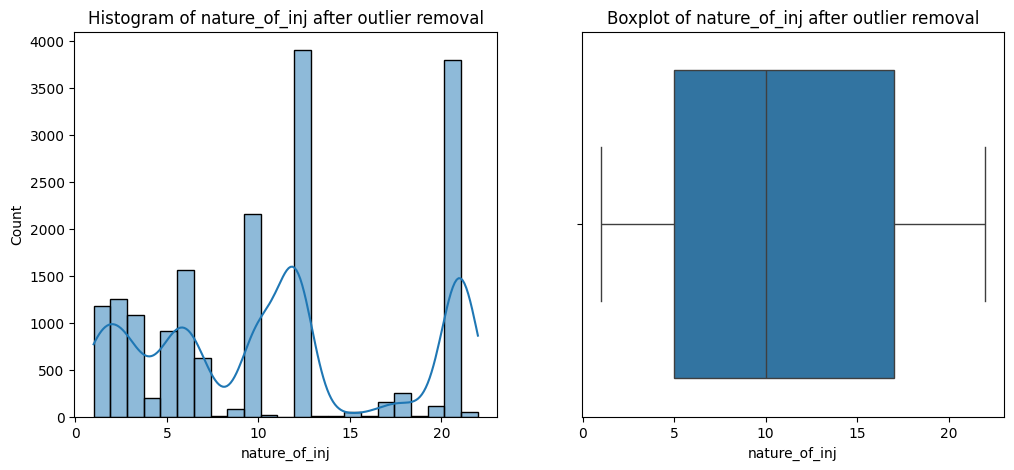

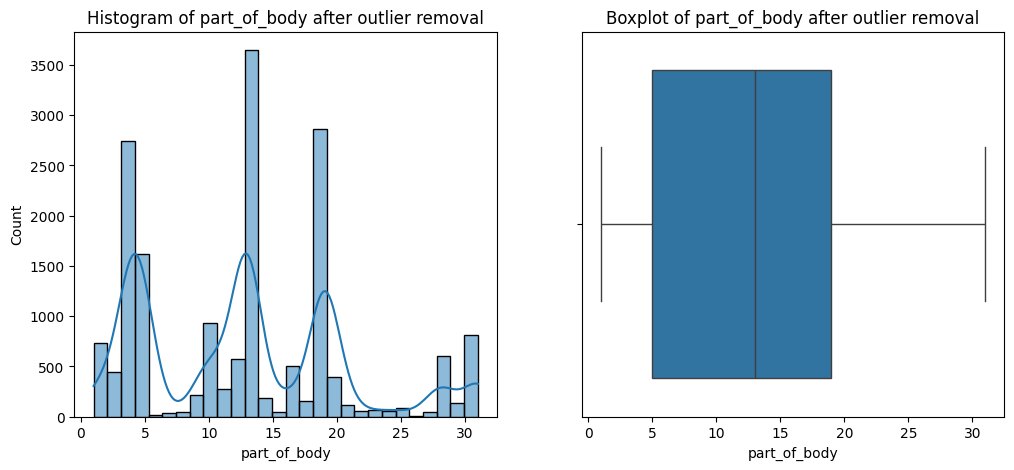

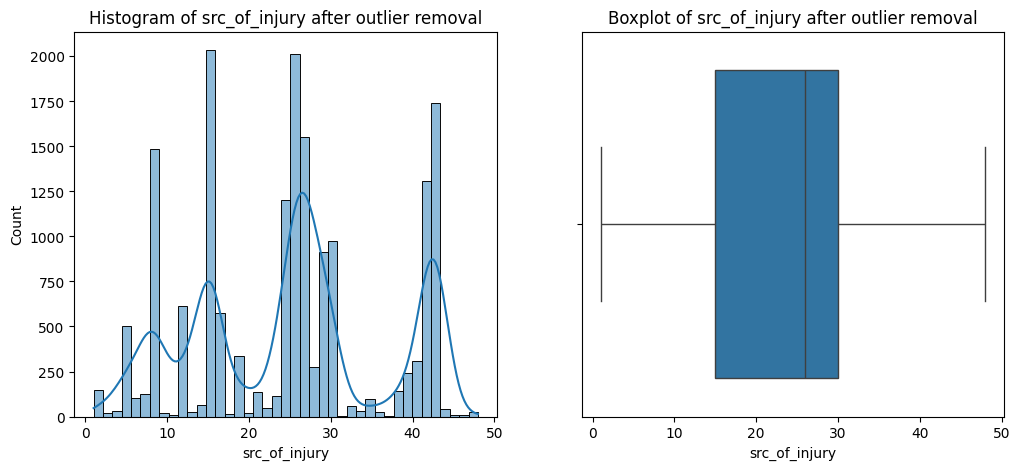

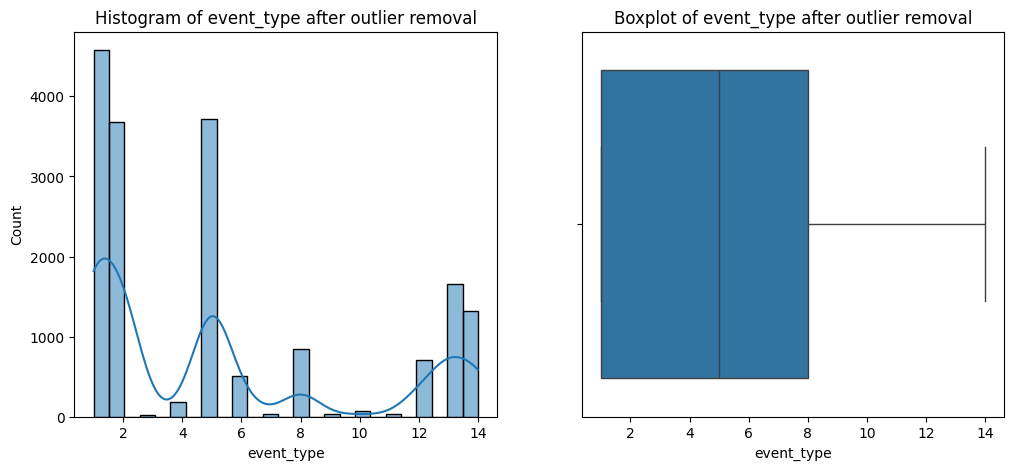

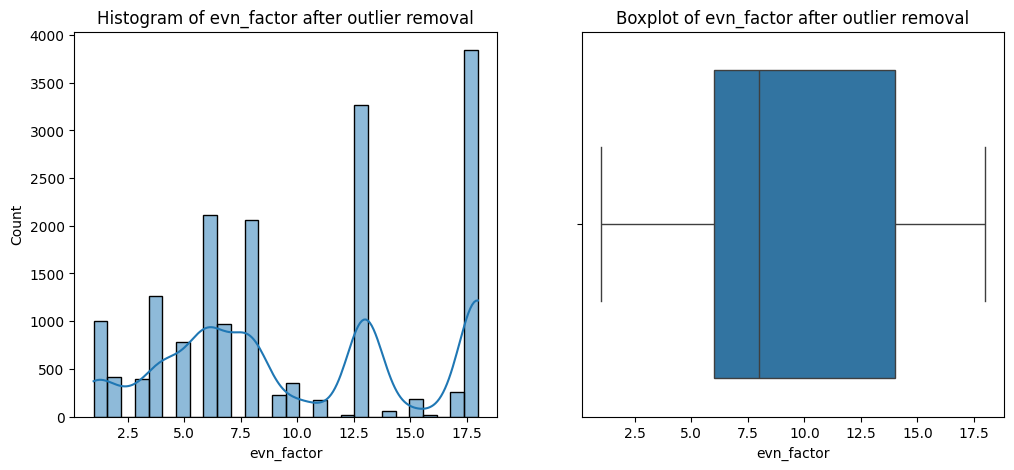

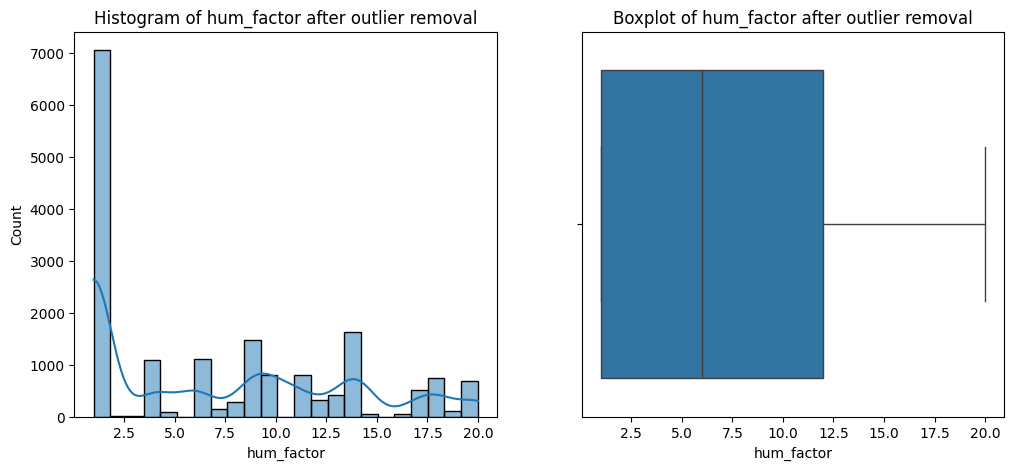

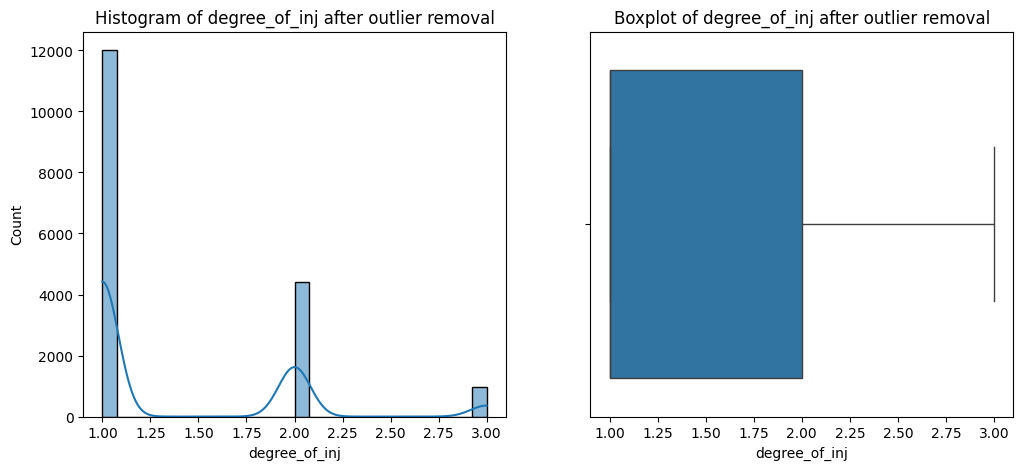

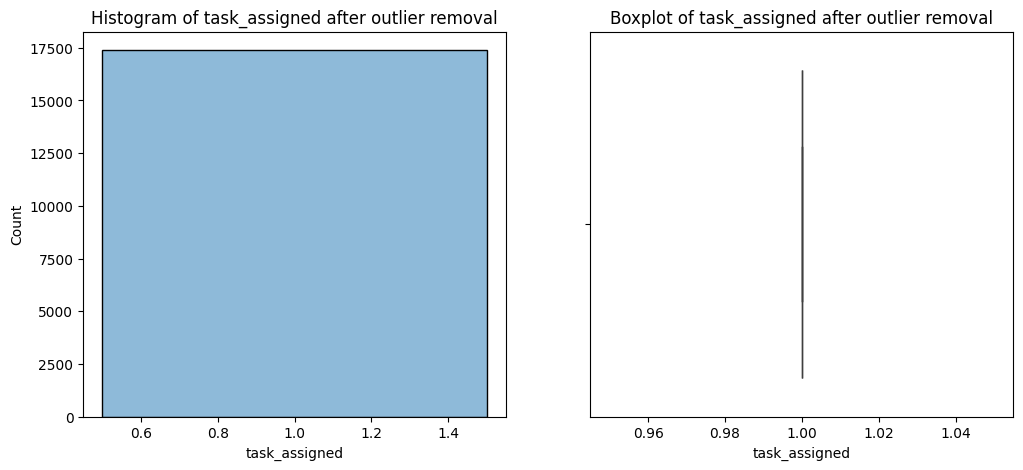

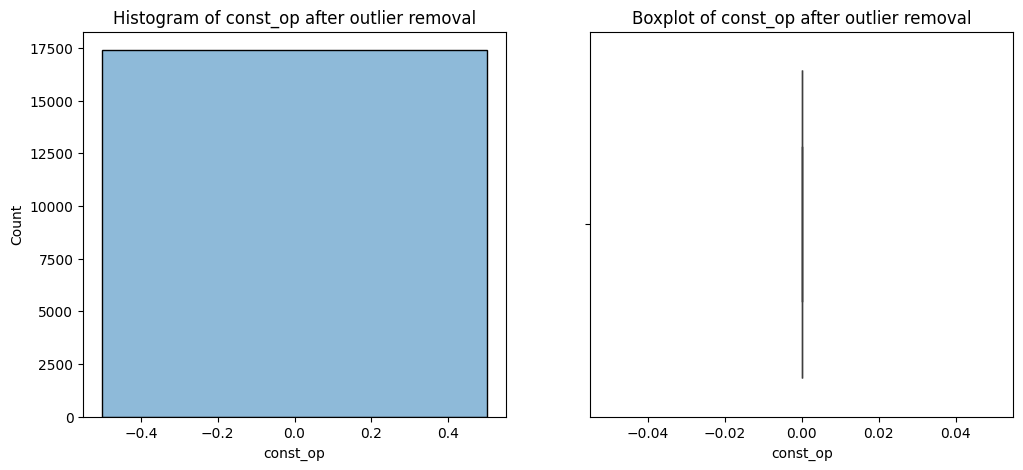

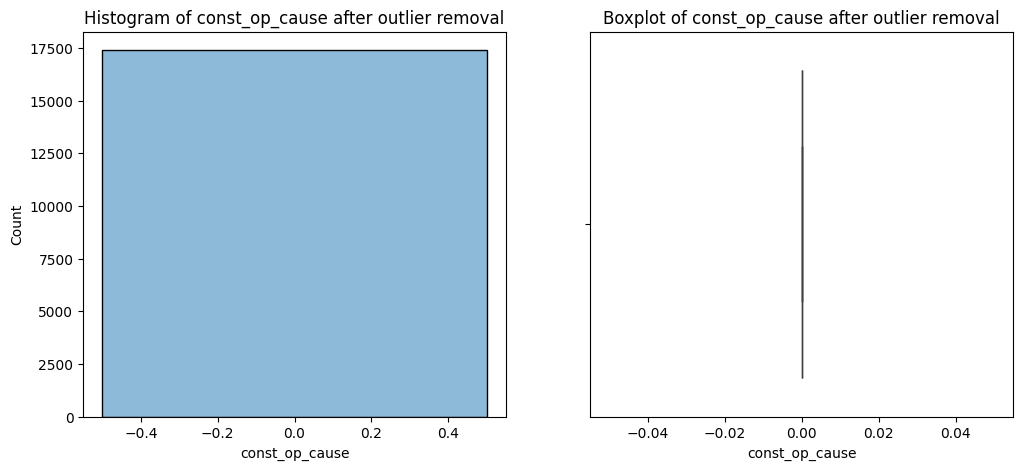

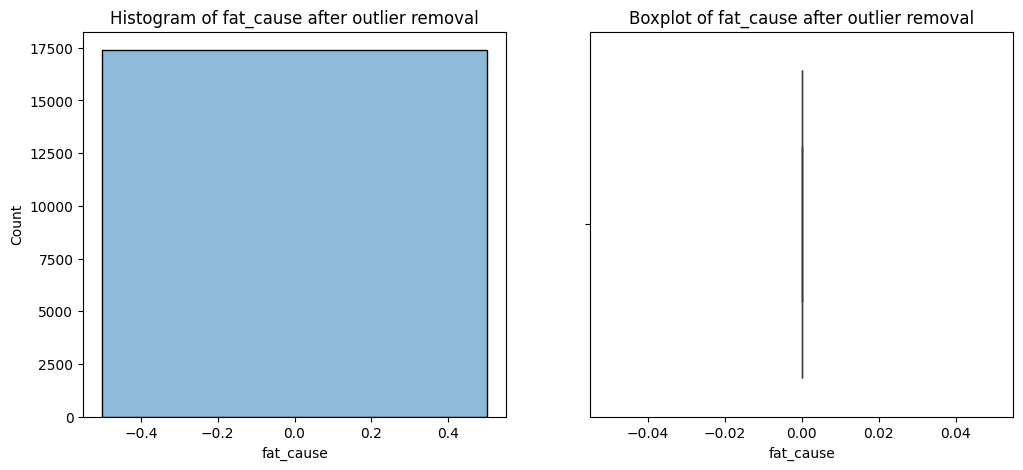

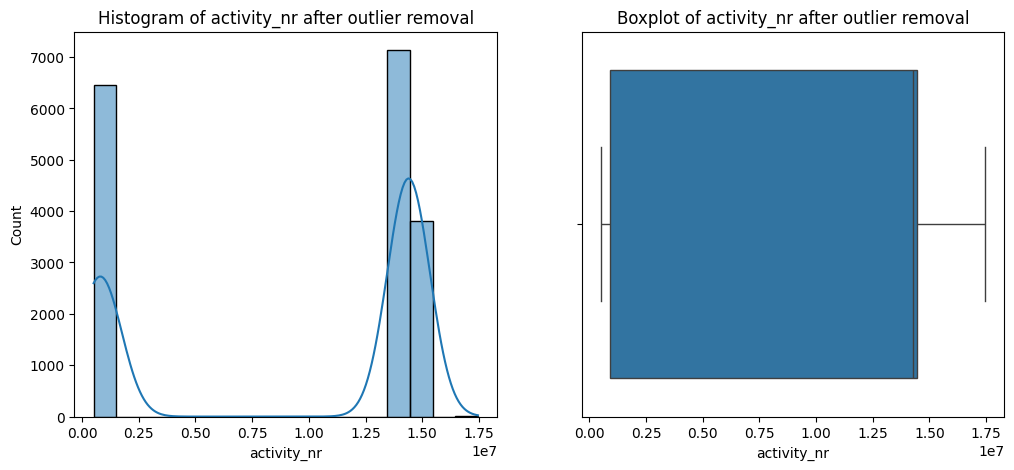

In [ ]:
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Return a filtered DataFrame that excludes outliers
    return data[(data[column] >= lower_bound) &  (data[column] <= upper_bound)]

# Start with the original data
cleaned_data = data.copy()  # Create a copy for cleaning

# Remove outliers for each numeric column
for column in numeric_columns:
    cleaned_data = remove_outliers_iqr(cleaned_data, column)

# Visualize the cleaned data again to confirm outliers are removed
for column in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(cleaned_data[column], kde=True)
    plt.title(f'Histogram of {column} after outlier removal')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cleaned_data[column])
    plt.title(f'Boxplot of {column} after outlier removal')

    plt.show()

In [ ]:
cleaned_data.select_dtypes("number").skew()

,0
sic_list,1.386603
rel_insp_nr,-0.774500
age,0.538923
nature_of_inj,0.291996
part_of_body,0.545035
src_of_injury,0.047758
event_type,0.854550
evn_factor,0.136054
hum_factor,0.539123
degree_of_inj,1.367047


In [ ]:
cleaned_data.shape

(17400, 27)

In [ ]:
cleaned_data["degree_of_inj"].value_counts()

,count
degree_of_inj,
1.0,12014
2.0,4404
3.0,982


**visualization**

 ***Use histograms and box plots to visualize individual features***

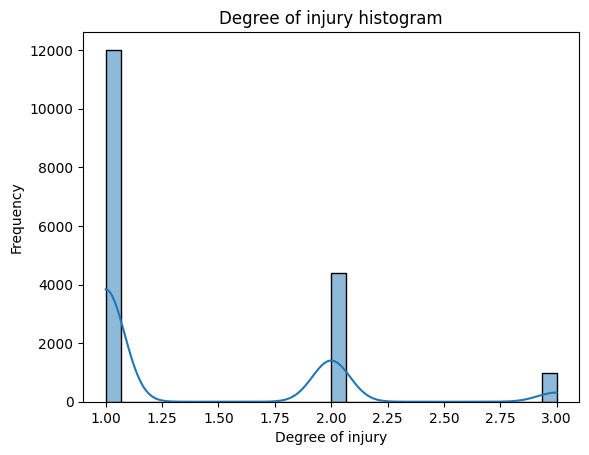

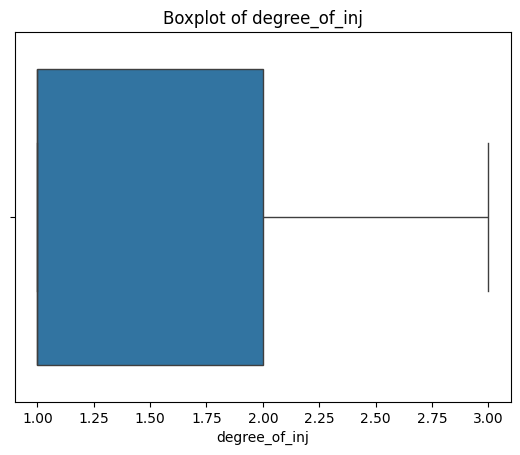

In [ ]:
# Histogram for degree of injury
sns.histplot(cleaned_data['degree_of_inj'].dropna(), bins=30, kde=True)
plt.title('Degree of injury histogram')
plt.xlabel('Degree of injury')
plt.ylabel('Frequency')
plt.show()

# Box plot for PM2.5
sns.boxplot(x=cleaned_data['degree_of_inj'].dropna())
plt.title('Boxplot of degree_of_inj')
plt.show()

***Scatter plots and bar plots to visualize the relationship between two variables.***

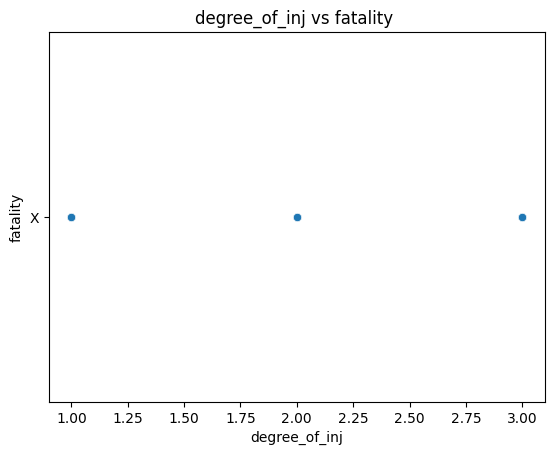

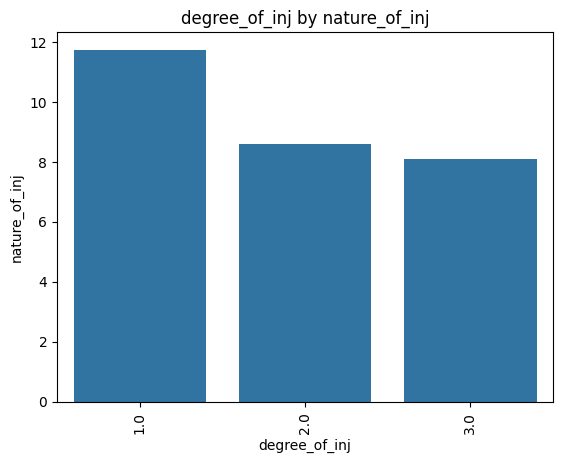

In [ ]:
# Scatter plot between degree of inury and fatality
sns.scatterplot(x='degree_of_inj', y='fatality', data=cleaned_data)
plt.title('degree_of_inj vs fatality ')
plt.show()

# Bar plot for average degree of injury by nature_of_inj
degree_of_inju_nature_of_inj = cleaned_data.groupby('degree_of_inj')['nature_of_inj'].mean().reset_index()
sns.barplot(x='degree_of_inj', y='nature_of_inj', data=degree_of_inju_nature_of_inj)
plt.xticks(rotation=90)
plt.title('degree_of_inj by nature_of_inj')
plt.show()

 ***Pair plots and heatmaps to explore relationships between multiple features.***

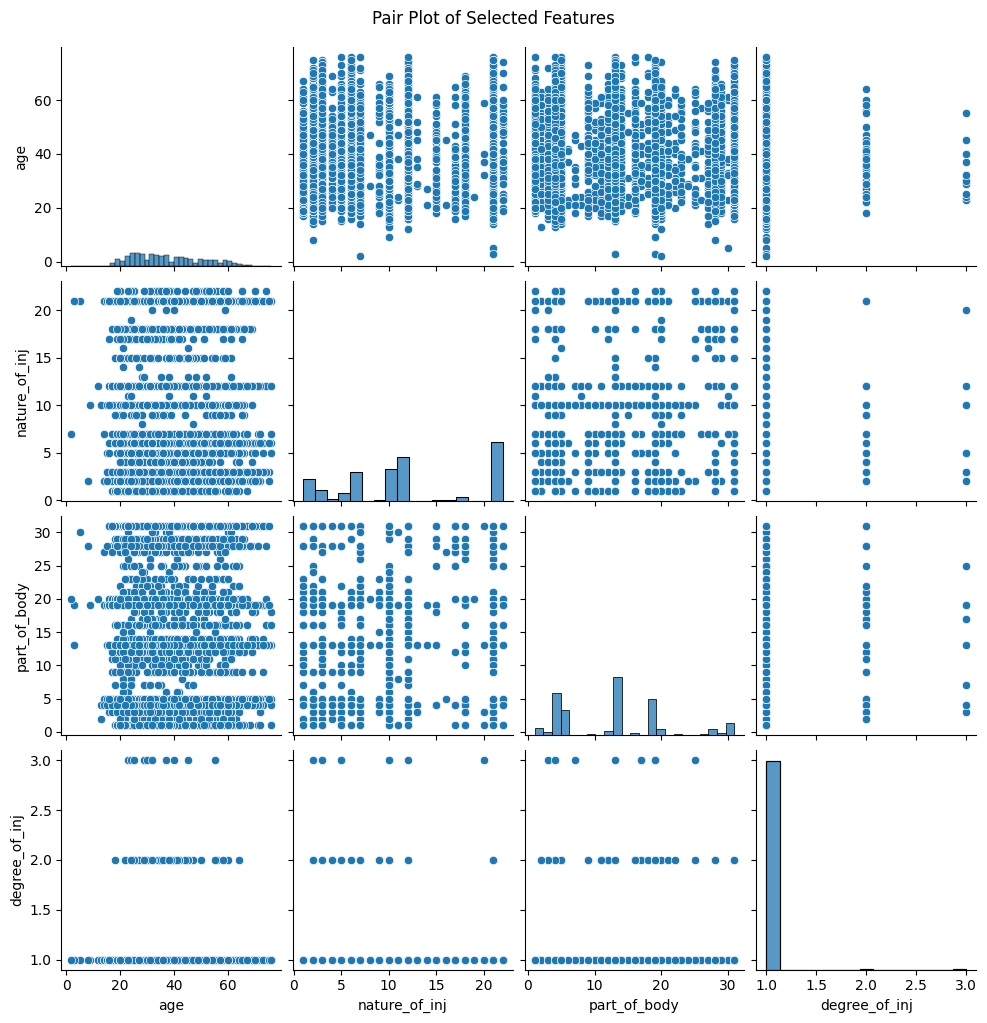

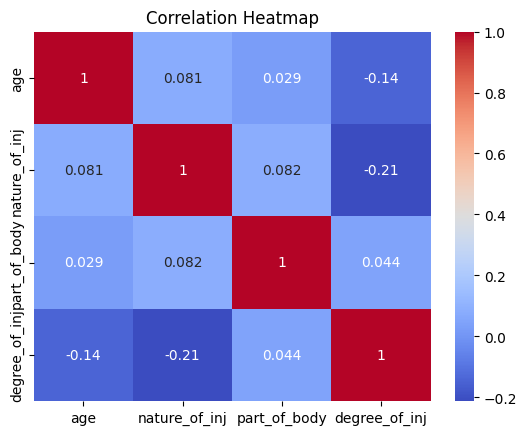

In [ ]:
# Pair plot for a subset of variables
sns.pairplot(cleaned_data[['age',
 'nature_of_inj',
 'part_of_body','degree_of_inj','fatality']].dropna())
plt.suptitle('Pair Plot of Selected Features', y=1.02)
plt.show()

# Heatmap for correlation
corr_matrix = cleaned_data[['age',
 'nature_of_inj',
 'part_of_body','degree_of_inj']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

***Use histograms and KDE plots to visualize distributions.***

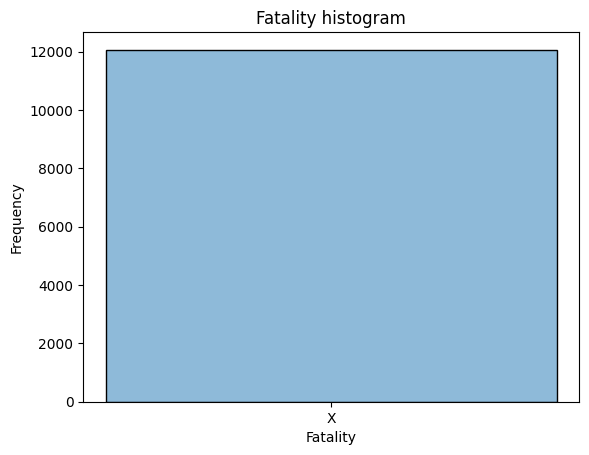

<ipython-input-34-4f2a584425eb>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_data['part_of_body'].dropna(), shade=True)


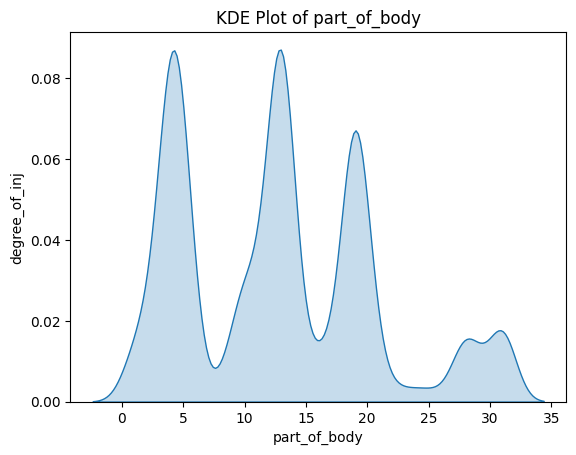

In [ ]:
# fatality happend in occupational sites using histograms and KDE
sns.histplot(cleaned_data['fatality'].dropna(), bins=30, kde=True)
plt.title('Fatality histogram')
plt.xlabel('Fatality')
plt.ylabel('Frequency')
plt.show()

# KDE plot for part of body injured
sns.kdeplot(cleaned_data['part_of_body'].dropna(), shade=True)
plt.title('KDE Plot of part_of_body')
plt.xlabel('part_of_body')
plt.ylabel('degree_of_inj')
plt.show()


***According to the graph we have get some insights like part of body,nature of injury etc directly proportional to degree of injury and fatality.***

***Assume that x is our features and y is target***

In [ ]:
x=cleaned_data.drop("degree_of_inj",axis=1)
y=cleaned_data["degree_of_inj"]

In [ ]:
x

,event_desc,event_keyword,sic_list,fatality,rel_insp_nr,age,sex,nature_of_inj,part_of_body,src_of_injury,...,fat_cause,load_dt.1,activity_nr,estab_name,site_city,site_state,safety_hlth,insp_type,insp_scope,union_status
1412,Employee killed when crushed by overhead load,"DISMANTLING,CRANE BOOM,TRUCK CRANE,WORK RULES,...",1791.0,X,17456682.0,48.0,M,2.0,20.0,27.0,...,0.0,2019-07-22 00:18:39 EDT,17456682,"N.A.C., INC.",FT. CAMPBELL,KY,S,A,B,N
1413,Employee's fingers caught in crimping blades,"ROTATING PARTS,ROTATING SHAFT,FINGER,ROTATING ...",3496.0,NaN,126804319.0,19.0,M,7.0,10.0,26.0,...,0.0,2019-07-22 00:18:39 EDT,17105776,TALCO ALUMINUM CO,Wills Point,TX,S,B,A,B
1415,Employee amputates fingertip in shear,"AMPUTATED,SHEAR,INADEQUATE MAINT,FINGER,GUARD,...",3961.0,NaN,120328539.0,25.0,M,1.0,10.0,26.0,...,0.0,2019-07-22 00:18:39 EDT,17071689,COX RADIO & SOUND,Lawton,OK,S,H,A,B
1416,Employee killed in trench cave-in,"ASPHYXIATED,WORK RULES,CONSTRUCTION,TRENCH,SHO...",1521.0,X,119782803.0,27.0,M,2.0,28.0,12.0,...,0.0,2019-07-22 00:18:39 EDT,17063082,TULSA JETCO INC,Claremore,OK,H,B,A,B
1417,Employee's fingertip amputated in mixer,"MIXER BLADE,AMPUTATED,FINGER,WORK RULES,MIXER,...",2051.0,NaN,119864494.0,41.0,M,1.0,10.0,43.0,...,0.0,2019-07-22 00:18:39 EDT,17063066,C&C TILE & CARPET CO,Tulsa,OK,H,G,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23888,"Employee killed by falling 5,000 lb vault door","HEART,WORK RULES,CONSTRUCTION,CRUSHED,LACERATI...",1799.0,NaN,107234866.0,34.0,M,12.0,19.0,43.0,...,0.0,2019-07-22 00:18:38 EDT,509240,J C R DEVELOPMENT CORP,Hillsboro,OR,S,H,A,B
23889,Employee killed in mill hammer (chipper) hog,"CHIPPER,CONVEYOR,FALL,UNGUARDED",2421.0,X,107233397.0,34.0,M,7.0,19.0,26.0,...,0.0,2019-07-22 00:18:38 EDT,509208,OROWEAT FOODS CO,Portland,OR,S,H,A,A
23891,Employee drowns as mudslide destroys dock cons...,"DOCK,DROWN,MUD SLIDE,FALLING OBJECT,WATER",8711.0,X,109431676.0,44.0,M,10.0,5.0,6.0,...,0.0,2019-07-22 00:18:38 EDT,509091,TUALATIN DEVELOPMENT CO,Tigard,OR,S,H,A,B
23893,"Employee fractures ribs, hip in fall from roof...","DECKING,FRACTURE,ROOF,WORK RULES,CONSTRUCTION,...",1629.0,NaN,105864813.0,43.0,M,12.0,4.0,42.0,...,0.0,2019-07-22 00:18:38 EDT,508945,PORTLAND SCHOOL DISTRICT 1 J,Portland,OR,S,H,A,A


In [ ]:
y

,degree_of_inj
1412,1.0
1413,2.0
1415,3.0
1416,1.0
1417,2.0
...,...
23888,2.0
23889,1.0
23891,1.0
23893,2.0


In [ ]:
cat_cleaned_data=x.select_dtypes(include="object")
cat_cleaned_data

,event_desc,event_keyword,fatality,sex,load_dt.1,estab_name,site_city,site_state,safety_hlth,insp_type,insp_scope,union_status
1412,Employee killed when crushed by overhead load,"DISMANTLING,CRANE BOOM,TRUCK CRANE,WORK RULES,...",X,M,2019-07-22 00:18:39 EDT,"N.A.C., INC.",FT. CAMPBELL,KY,S,A,B,N
1413,Employee's fingers caught in crimping blades,"ROTATING PARTS,ROTATING SHAFT,FINGER,ROTATING ...",NaN,M,2019-07-22 00:18:39 EDT,TALCO ALUMINUM CO,Wills Point,TX,S,B,A,B
1415,Employee amputates fingertip in shear,"AMPUTATED,SHEAR,INADEQUATE MAINT,FINGER,GUARD,...",NaN,M,2019-07-22 00:18:39 EDT,COX RADIO & SOUND,Lawton,OK,S,H,A,B
1416,Employee killed in trench cave-in,"ASPHYXIATED,WORK RULES,CONSTRUCTION,TRENCH,SHO...",X,M,2019-07-22 00:18:39 EDT,TULSA JETCO INC,Claremore,OK,H,B,A,B
1417,Employee's fingertip amputated in mixer,"MIXER BLADE,AMPUTATED,FINGER,WORK RULES,MIXER,...",NaN,M,2019-07-22 00:18:39 EDT,C&C TILE & CARPET CO,Tulsa,OK,H,G,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...
23888,"Employee killed by falling 5,000 lb vault door","HEART,WORK RULES,CONSTRUCTION,CRUSHED,LACERATI...",NaN,M,2019-07-22 00:18:38 EDT,J C R DEVELOPMENT CORP,Hillsboro,OR,S,H,A,B
23889,Employee killed in mill hammer (chipper) hog,"CHIPPER,CONVEYOR,FALL,UNGUARDED",X,M,2019-07-22 00:18:38 EDT,OROWEAT FOODS CO,Portland,OR,S,H,A,A
23891,Employee drowns as mudslide destroys dock cons...,"DOCK,DROWN,MUD SLIDE,FALLING OBJECT,WATER",X,M,2019-07-22 00:18:38 EDT,TUALATIN DEVELOPMENT CO,Tigard,OR,S,H,A,B
23893,"Employee fractures ribs, hip in fall from roof...","DECKING,FRACTURE,ROOF,WORK RULES,CONSTRUCTION,...",NaN,M,2019-07-22 00:18:38 EDT,PORTLAND SCHOOL DISTRICT 1 J,Portland,OR,S,H,A,A


In [ ]:
cat_cleaned_data_columns=list(cat_cleaned_data)
cat_cleaned_data_columns

['event_desc',
 'event_keyword',
 'fatality',
 'sex',
 'load_dt.1',
 'estab_name',
 'site_city',
 'site_state',
 'safety_hlth',
 'insp_type',
 'insp_scope',
 'union_status']

***Encode the categorical columns by using OneHotEncoder***

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# Fit and transform the specified categorical columns
encoded_data = enc.fit_transform(x[cat_cleaned_data_columns]).toarray()

encoded_data

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(cat_cleaned_data_columns))

# Combine the encoded DataFrame with the original cleaned_data (excluding the original categorical columns)
x = pd.concat([x.drop(columns=cat_cleaned_data_columns).reset_index(drop=True), encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
x

,sic_list,rel_insp_nr,age,nature_of_inj,part_of_body,src_of_injury,event_type,evn_factor,hum_factor,task_assigned,...,insp_type_J,insp_type_K,insp_scope_A,insp_scope_B,insp_scope_C,insp_scope_D,union_status_A,union_status_B,union_status_N,union_status_Y
0,1791.0,17456682.0,48.0,2.0,20.0,27.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3496.0,126804319.0,19.0,7.0,10.0,26.0,2.0,4.0,9.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3961.0,120328539.0,25.0,1.0,10.0,26.0,2.0,3.0,4.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1521.0,119782803.0,27.0,2.0,28.0,12.0,2.0,18.0,4.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2051.0,119864494.0,41.0,1.0,10.0,43.0,2.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17395,1799.0,107234866.0,34.0,12.0,19.0,43.0,1.0,8.0,11.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17396,2421.0,107233397.0,34.0,7.0,19.0,26.0,2.0,18.0,7.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
17397,8711.0,109431676.0,44.0,10.0,5.0,6.0,14.0,17.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17398,1629.0,105864813.0,43.0,12.0,4.0,42.0,5.0,13.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
x.shape

(17400, 48350)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [ ]:
# Assume x is feature set and y is target variable
# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

RandomForestClassifier(random_state=42)

**Feature Engineering**

***By using feature importance method findout important features whichever we can apply for further process.***

In [ ]:
# Get feature importances
importances = model.feature_importances_
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)


                                                 Feature  Importance
30152                                       fatality_nan    0.224943
30151                                         fatality_X    0.211216
3                                          nature_of_inj    0.022993
13                                           activity_nr    0.021858
4                                           part_of_body    0.019247
...                                                  ...         ...
40021               estab_name_NINETY SIX CANNING CO INC    0.000000
15838  event_keyword_BURN,ELECTRIC ARC,LUNG,OVERHEAD ...    0.000000
8325   event_desc_Employee killed when engulfed in ce...    0.000000
40013                  estab_name_NICOLET INDUSTRIES INC    0.000000
46747                                  site_city_MASPETH    0.000000

[48350 rows x 2 columns]


In [ ]:
# Set a threshold (example: 0.01)
threshold = 0.01

# Select features with importance above the threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]

print("Selected Features:")
print(selected_features)

X_selected = x[selected_features['Feature']]

Selected Features:
             Feature  Importance
30152   fatality_nan    0.224943
30151     fatality_X    0.211216
3      nature_of_inj    0.022993
13       activity_nr    0.021858
4       part_of_body    0.019247
7         evn_factor    0.016219
1        rel_insp_nr    0.014885
5      src_of_injury    0.013344
2                age    0.011846
0           sic_list    0.011779


***The above mentioned features are now important for this project.***

In [ ]:
X_selected

,fatality_nan,fatality_X,nature_of_inj,activity_nr,part_of_body,evn_factor,rel_insp_nr,src_of_injury,age,sic_list
0,0.0,1.0,2.0,17456682,20.0,1.0,17456682.0,27.0,48.0,1791.0
1,1.0,0.0,7.0,17105776,10.0,4.0,126804319.0,26.0,19.0,3496.0
2,1.0,0.0,1.0,17071689,10.0,3.0,120328539.0,26.0,25.0,3961.0
3,0.0,1.0,2.0,17063082,28.0,18.0,119782803.0,12.0,27.0,1521.0
4,1.0,0.0,1.0,17063066,10.0,1.0,119864494.0,43.0,41.0,2051.0
...,...,...,...,...,...,...,...,...,...,...
17395,1.0,0.0,12.0,509240,19.0,8.0,107234866.0,43.0,34.0,1799.0
17396,0.0,1.0,7.0,509208,19.0,18.0,107233397.0,26.0,34.0,2421.0
17397,0.0,1.0,10.0,509091,5.0,17.0,109431676.0,6.0,44.0,8711.0
17398,1.0,0.0,12.0,508945,4.0,13.0,105864813.0,42.0,43.0,1629.0


In [ ]:
y

,degree_of_inj
1412,1.0
1413,2.0
1415,3.0
1416,1.0
1417,2.0
...,...
23888,2.0
23889,1.0
23891,1.0
23893,2.0


***Installing imbalanced learn for SMOTE technique to varify features and target are balanced or imbalanced.***

In [ ]:
!pip install imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 2.8 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote=SMOTE(random_state=42)
x_smote,y_smote=smote.fit_resample(x,y)

In [ ]:
class_counts = y_smote.value_counts()
print('Balanced class distribution:\n',class_counts)
print('Balanced class ratios:\n',class_counts/len(y_smote))

Balanced class distribution:
 degree_of_inj
1.0    12014
2.0    12014
3.0    12014
Name: count, dtype: int64
Balanced class ratios:
 degree_of_inj
1.0    0.333333
2.0    0.333333
3.0    0.333333
Name: count, dtype: float64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_selected)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

**Data Splitting**

***Split the data into training and testing sets***

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

***Standardization of data***

In [ ]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**Model Selection**

***Initialize models such as Logisticregression,RandomForest classifier,DecissionTree,SVM,KNN and Calculate Training Accuracy Scores***

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train_scaled, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(x_test_scaled)

In [ ]:
print("Logistic Regression prediction:",y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Logistic Regression prediction: [1. 2. 1. ... 2. 1. 2.]
Accuracy: 0.9431034482758621


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dt.predict(x_test_scaled)

In [ ]:
print("Decision Tree prediction:",y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree prediction: [1. 2. 1. ... 2. 1. 2.]
Accuracy: 0.9149425287356322


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(x_test_scaled)

In [ ]:
print("Random Forest prediction:",y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

Random Forest prediction: [1. 2. 1. ... 2. 1. 3.]
Accuracy: 0.9410919540229885


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train_scaled, y_train)

SVC()

In [ ]:
y_pred = svm.predict(x_test_scaled)

In [ ]:
print("SVM prediction:",y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

SVM prediction: [1. 2. 1. ... 2. 1. 2.]
Accuracy: 0.9431034482758621


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(x_test_scaled)

In [ ]:
print("KNN prediction:",y_pred)
print("Accuracy:", accuracy_score(y_test, y_pred))

KNN prediction: [1. 2. 1. ... 2. 1. 2.]
Accuracy: 0.9324712643678161


**Model Training and Evaluation**

** Model Training and Hyperparameter Tuning**:- The code performs hyperparameter tuning as before.
Metrics Calculation: After tuning, it calculates accuracy, precision, recall, F1 score, and ROC AUC score for each model on the test set.

Accuracy: Measures the overall correctness of the model.

Precision: Measures the accuracy of positive predictions.

Recall: Measures the ability to find all positive samples.

F1 Score: Harmonic mean of precision and recall.

ROC AUC: Measures the ability of the model to distinguish between classes.

Results Visualization: Finally, it presents the results in a DataFrame for easier comparison.




In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
# Apply classification algorithms (Logistic Regression, SVM, Random Forest,Decision tree,KNN)
# Hyperparameter tuning using GridSearchCV

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg_params = {'C': [0.01, 0.1, 1, 10]}
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5)
log_reg_grid.fit(x_train_scaled, y_train)

# SVM
svm = SVC()
svm_params = {'C': [0.1,1], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(x_train_scaled, y_train)

# Random Forest
rf = RandomForestClassifier()
rf_params = {'n_estimators': [10,50, 100, 150], 'max_depth': [2,3, 5, 7]}
rf_grid = GridSearchCV(rf, rf_params, cv=5)
rf_grid.fit(x_train_scaled, y_train)

# Decision tree
dt = DecisionTreeClassifier()
dt_params = {'max_depth': [2,3, 5, 7]}
dt_grid = GridSearchCV(dt, dt_params, cv=5)
dt_grid.fit(x_train_scaled, y_train)

#KNN
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(x_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [ ]:
# Evaluate model performance
def evaluate_model(model, x_test_scaled, y_test):
    y_pred = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [ ]:
# Evaluate model performance
def evaluate_model(model, x_test_scaled, y_test):
    """
    Evaluates a model's performance by predicting on the test set and computing metrics.

    Args:
        model: The trained machine learning model.
        x_test_scaled: The scaled features of the test set.
        y_test: The true labels of the test set.
    """

    # Predict labels for the test set
    y_pred = model.predict(x_test_scaled)

    # Check if the lengths of y_test and y_pred match
    if len(y_test) != len(y_pred):
        print(f"Warning: Inconsistent sample sizes. y_test: {len(y_test)}, y_pred: {len(y_pred)}")
        # Attempt to resolve the issue by truncating the larger array
        min_len = min(len(y_test), len(y_pred))
        y_test = y_test[:min_len]
        y_pred = y_pred[:min_len]
        print(f"Truncated to minimum length: {min_len}")

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

In [ ]:
print("\nEvaluation for Logistic Regression:")
evaluate_model(log_reg_grid, x_test_scaled, y_test)

print("\nEvaluation for SVM:")
evaluate_model(svm_grid, x_test_scaled, y_test)

print("\nEvaluation for Random Forest:")
evaluate_model(rf_grid, x_test_scaled, y_test)

print("\nEvaluation for Decision Tree:")
evaluate_model(dt_grid, x_test_scaled, y_test)

print("\nEvaluation for KNN:")
evaluate_model(knn_grid, x_test_scaled, y_test)


Evaluation for Logistic Regression:
Accuracy: 0.9431
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2420
         2.0       0.82      0.99      0.90       867
         3.0       0.00      0.00      0.00       193

    accuracy                           0.94      3480
   macro avg       0.61      0.66      0.63      3480
weighted avg       0.90      0.94      0.92      3480


Evaluation for SVM:
Accuracy: 0.9431
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2420
         2.0       0.82      0.99      0.90       867
         3.0       0.00      0.00      0.00       193

    accuracy                           0.94      3480
   macro avg       0.61      0.66      0.63      3480
weighted avg       0.90      0.94      0.92      3480


Evaluation for Random Forest:
Accuracy: 0.9431
Classification Report:
              precision    re

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Accuracy: 0.9371
Classification Report:
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00      2420
         2.0       0.82      0.96      0.88       867
         3.0       0.27      0.06      0.10       193

    accuracy                           0.94      3480
   macro avg       0.70      0.67      0.66      3480
weighted avg       0.91      0.94      0.92      3480



In [ ]:
from sklearn.datasets import make_classification
# Create a synthetic dataset
x, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define parameter grids for each model
param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Logistic Regression": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']  # solvers that support L1 regularization
    },
    "SVM": {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "KNN": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }
}

# Dictionary to hold the best models
best_models = {}

# Hyperparameter tuning using Grid Search
for name, model in [
    ("Random Forest", RandomForestClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("SVM", SVC(probability=True)),
    ("KNN", KNeighborsClassifier())
]:
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.4f}\n")

# Evaluate the best models on the test set
for name, model in best_models.items():
    test_score = model.score(x_test, y_test)
    print(f"Test accuracy for {name}: {test_score:.4f}")


Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best cross-validation score for Random Forest: 0.9313

Tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 20, 'min_samples_split': 5}
Best cross-validation score for Decision Tree: 0.8962

Tuning Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.01, 'solver': 'saga'}
Best cross-validation score for Logistic Regression: 0.8262

Tuning SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best cross-validation score for SVM: 0.9250

Tuning KNN...
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}
Best cross-validation score for KNN: 0.9025

Test accuracy for Random Forest: 0.9650
Test accuracy for Decision Tree: 0.9100
Test accuracy for Logistic Regression: 0.8300
Test accuracy for SVM: 0.9450
Test accuracy for KNN: 0.9250


***Find the model with the highest test accuracy***

In [ ]:
# Store the test accuracies in a dictionary
test_accuracies = {
    'Random Forest': 0.9650,
    'Decision Tree': 0.9100,
    'Logistic Regression': 0.8300,
    'SVM': 0.9450,
    'KNN': 0.9250
}

# Find the model with the highest test accuracy
best_model = max(test_accuracies, key=test_accuracies.get)
best_accuracy = test_accuracies[best_model]

# Display the best model and its accuracy
print(f"The model with the highest test accuracy is: {best_model}")
print(f"Highest Test Accuracy: {best_accuracy:.4f}")

The model with the highest test accuracy is: Random Forest
Highest Test Accuracy: 0.9650


 ***Save the best model and Choose the model with the highest performance metrics***

In [ ]:

best_model = max([log_reg_grid, svm_grid, rf_grid], key=lambda model: model.best_score_)
print(f"\nBest model: {best_model.best_estimator_}")


Best model: RandomForestClassifier(max_depth=7, n_estimators=50)


**Save the Model**

In [ ]:
# Save the best model using joblib
import joblib
joblib.dump(best_model, 'final_best_occupational_safety_model.pkl')

print("\nBest model saved as 'final_best_occupational_safety_model.pkl'")


Best model saved as 'final_best_occupational_safety_model.pkl'


**Load the model**

In [ ]:
import joblib
# Load the saved model
loaded_model = joblib.load('final_best_occupational_safety_model.pkl')

***Predict degree of injury of a sample data by using model which I saved as best model***

In [ ]:
sample_data = pd.DataFrame({'fatality_nan':[0.0],	'fatality_X':[1.0],	'nature_of_inj':[2.0],	'activity_nr':[17456682],	'part_of_body':[20.0],	'evn_factor':[1.0],	'rel_insp_nr':[17456682],	'src_of_injury':[27],	'age':[48],	'sic_list':[1791]})

In [ ]:
prediction=loaded_model.predict(sample_data)
print("Predicted Degree of injury:",prediction[0])

Predicted Degree of injury: 1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


***Prediction done by using the model is accurate***

***In OSHA Accident and inspection data, the nature of injury refers to the type of injury sustained by the worker during an accident. it describes the specific physical harm or illness resulting from the incident. some common categories of the nature of injury indicates in datasets***
1.Fractures
2.Lacerations
3.Burns
4.Contusions
5.Amputations
6.Sprains and strains
7.Respiratory Condition
8.Hearing loss
9.Electrocution
10.Chemical Burns
11.Puncture wounds
12.Cumulative Trauma Disorder

***In OSHA (Occupational Safety and Health Administration) reports, the "Degree of Injury" typically refers to the severity level of an injury sustained during a workplace incident. The classification often helps determine the response and preventive measures needed. Common categories for "Degree of Injury" in OSHA data include:***

1. Fatal – The injury resulted in the death of the worker.


2. Severe – The injury was serious, often leading to permanent disability, significant medical treatment, or hospitalization.


3. Moderate – The injury required medical attention beyond first aid but was not life-threatening.


4. Minor – The injury was less severe, potentially treated on-site or with basic first aid, and did not require extensive medical treatment.


**Key Insights:**
*This project successfully built a predictive model using OSHA accident and inspection data to classify the degree of injury in workplace incidents. By using a Random Forest Classifier the model achieved high accuracy, demonstrating its potential for real world application. Insights from feature importance suggest that significantly influence injury severity,offering valuable information for targeted safety measures. While the model requires all features for optimal performance, future improvements could focus on simplifying feature requirements. Overall, this project shows how machine learning can contribute to enhancing workplace safety and guiding inspection priorities.*